In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [ ]:
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)

In [ ]:
# Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
first_date = session.query(Measurement).\
    order_by(desc(Measurement.date)).\
    first().date
print(measurement_results)


2017-08-23
2016-08-23


              prcp
count  2021.000000
mean      4.505888
std      11.713487
min       0.000000
25%       0.000000
50%       0.500000
75%       3.300000
max     170.200000
{'session': <sqlalchemy.orm.session.Session object at 0x000001FB38D85688>, '_polymorphic_adapters': {}, '_entities': [<sqlalchemy.orm.query._ColumnEntity object at 0x000001FB3A78F708>, <sqlalchemy.orm.query._ColumnEntity object at 0x000001FB3A78F688>], '_primary_entity': None, '_has_mapper_entities': False, '_mapper_adapter_map': {<class 'sqlalchemy.ext.automap.measurement'>: (<Mapper at 0x1fb38c50888; measurement>, None), <Mapper at 0x1fb38c50888; measurement>: (<Mapper at 0x1fb38c50888; measurement>, None)}, '_criterion': <sqlalchemy.sql.elements.BinaryExpression object at 0x000001FB3A78FF88>, 'dispatch': <sqlalchemy.event.base.QueryEventsDispatch object at 0x000001FB38E6C708>}


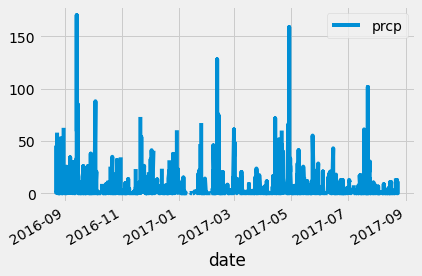

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
startDate = (dt.datetime.strptime(first_date,"%Y-%m-%d") - dt.timedelta(days=365)).strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement).\
    filter(Measurement.date >= '2016-08-23').\
    with_entities(Measurement.date,Measurement.prcp)


# Save the query results as a Pandas DataFrame and set the index to the date column
results = pd.read_sql(scores.statement,conn,parse_dates=["date"])
results = results.set_index("date")
# Sort the dataframe by date
results = results.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
plt = results.plot()
print(results.describe())

In [83]:
stations_cnt = session.query(Station).count()
print(stations_cnt)

9


In [94]:
#Finding Station Activity
station_activity = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station)))
for row in station_activity:
    print(row)
    
most_active_id = station_activity.first()[0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [101]:
#Min / Average / Max For Most Active station
temps = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_id)
print(temps.first())

(12.2, 22.03582251082252, 29.4)


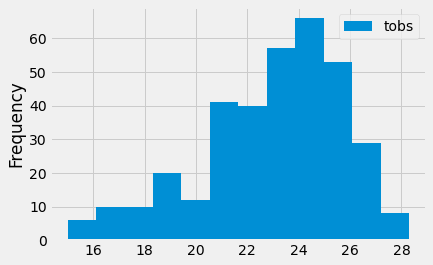

In [107]:
year_temps = session.query(Measurement).\
    filter(Measurement.station == most_active_id).\
    filter(Measurement.date >= '2016-08-23').\
    with_entities(Measurement.tobs)

year_temps_df = pd.read_sql(year_temps.statement,conn).plot.hist(bins = 12)

In [108]:
session.close()